In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
# two lines below needed for seaborn visualson panda, update.
import matplotlib.style  
import matplotlib as mpl

In [38]:
df1 = pd.read_csv('AB_NYC_2019.csv')

In [39]:
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [6]:
# Data cleaning 
# Note: out of the 48,895 units, 10,052 units have no reviews at all. 
# name, host_name, last_review, can be removed. 
# reviews_per_month NAN - 0. 
df1.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

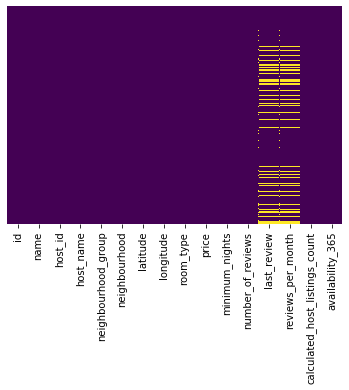

In [7]:
sns.heatmap(df1.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [8]:
df1.drop(['name','id','last_review'],axis=1, inplace=True) 

In [9]:
df1.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [10]:
# Fill in NaN values. 
df1.fillna({'reviews_per_month':0},inplace=True)

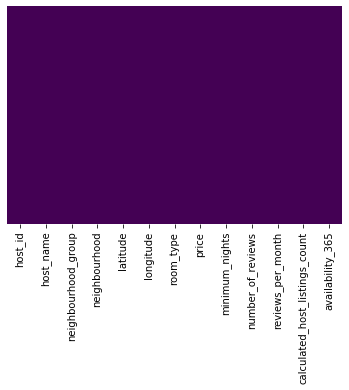

In [11]:
#Check changes
sns.heatmap(df1.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [12]:
#Examining categorical columns
df1['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [13]:
df1['neighbourhood'].nunique()

221

# Exploring and Visualizing Data

In [14]:
top_host = df1.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [15]:
top_host_check = df1.calculated_host_listings_count.max()
top_host_check

327

In [16]:
sns.set(rc={'figure.figsize':(10,8)},style='whitegrid')
sns.set_palette("pastel")

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '7503643')]

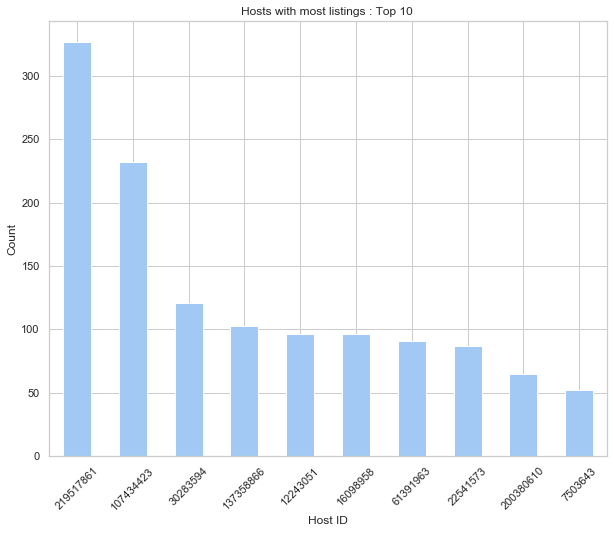

In [17]:
v1 = top_host.plot(kind='bar')
v1.set_title('Hosts with most listings : Top 10 ')
v1.set_xlabel('Host ID')
v1.set_ylabel('Count')
v1.set_xticklabels(v1.get_xticklabels(),rotation=45)

In [18]:
#Neighbourhoods 

sub1 = df1.loc[df1['neighbourhood_group'] == 'Brooklyn']
pricesub1=sub1[['price']]

sub2 = df1.loc[df1['neighbourhood_group'] == 'Manhattan']
pricesub2 = sub2[['price']]

sub3 = df1.loc[df1['neighbourhood_group'] == 'Queens']
pricesub3 = sub3[['price']]

sub4 = df1.loc[df1['neighbourhood_group'] == 'Staten Island']
pricesub4 = sub4[['price']]

sub5 = df1.loc[df1['neighbourhood_group'] == 'Bronx']
pricesub5 = sub5[['price']]

# Compiling all dataframes in one list 
price_list_by_n = [pricesub1,pricesub2,pricesub3,pricesub4,pricesub5]



In [19]:
#Empty list to use later
price_distribution_by_n = []

n_list = ['Brooklyn','Manhattan','Queens','Staten Island','Bronx']

In [20]:
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    price_distribution_by_n.append(i)

In [21]:
price_distribution_by_n[0].rename(columns={'price':n_list[0]}, inplace=True)
price_distribution_by_n[1].rename(columns={'price':n_list[1]}, inplace=True)
price_distribution_by_n[2].rename(columns={'price':n_list[2]}, inplace=True)
price_distribution_by_n[3].rename(columns={'price':n_list[3]}, inplace=True)
price_distribution_by_n[4].rename(columns={'price':n_list[4]}, inplace=True)

In [22]:
stat_df=price_distribution_by_n
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


In [23]:
# Take out extreme values before creating visualization
sub_df = df1[df1.price < 500]

Text(0.5, 1.0, 'Density and Distribution of prices by Neighbourhood')

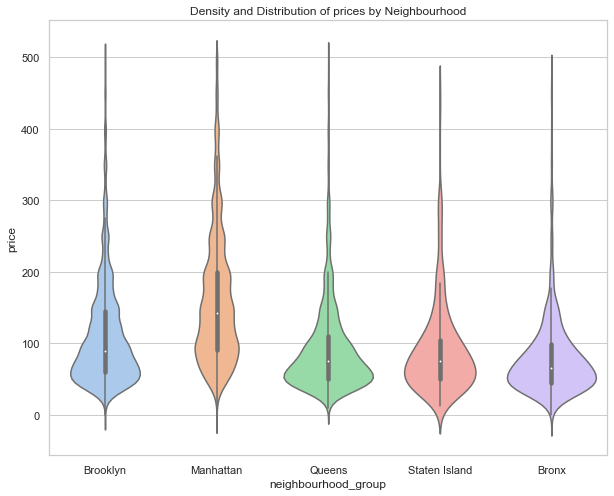

In [24]:
#violin plot to display distribution and density 
v2 = sns.violinplot (data=sub_df, x = 'neighbourhood_group',y='price')
v2.set_title('Density and Distribution of prices by Neighbourhood')

In [25]:
# Finding top 10 neighbourhoods because there are too many 
df1['neighbourhood'].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [26]:
#let's now combine this with our boroughs and room type for a rich visualization we can make
#grabbing top 10 neighbourhoods for sub-dataframe

sub_6=df1.loc[df1['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]

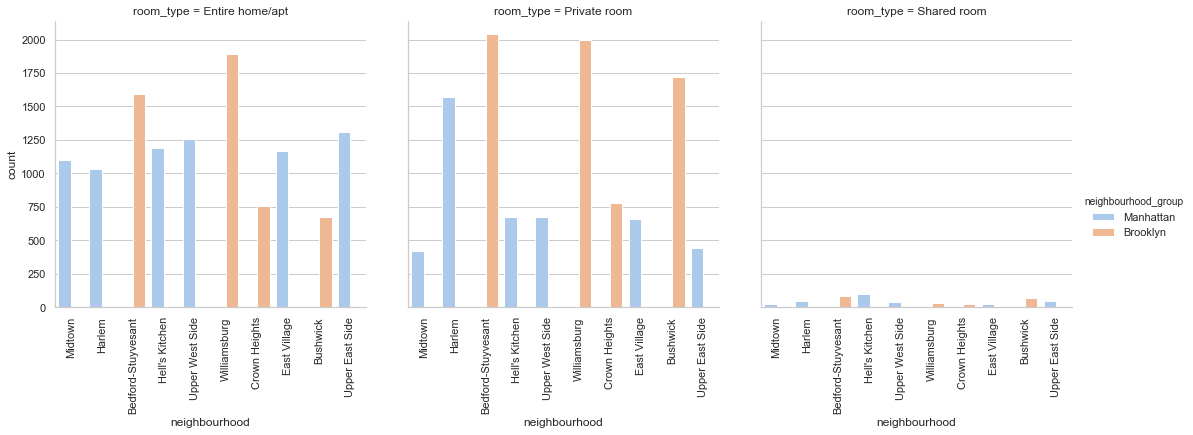

In [27]:
v3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_6, kind='count')
v3.set_xticklabels(rotation=90)

# Most popular for Manhattan: Harlem and Upper east, Brooklyn : Williamsburg and Bedford 
# shared rooms barely available 

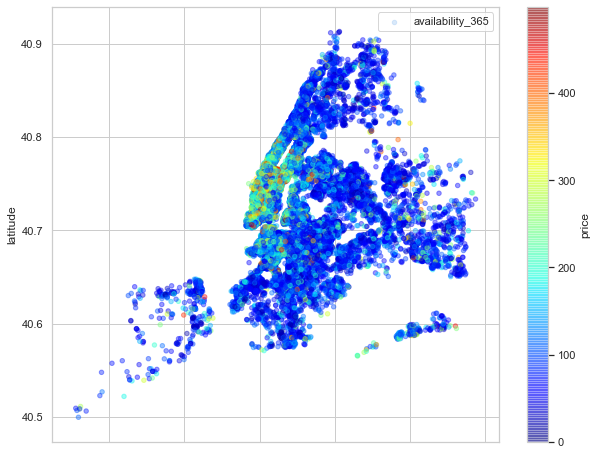

In [28]:
v4 = sub_df.plot(kind='scatter',x='longitude',y='latitude',label='availability_365',c='price',
               cmap = plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,8))
v4.legend()

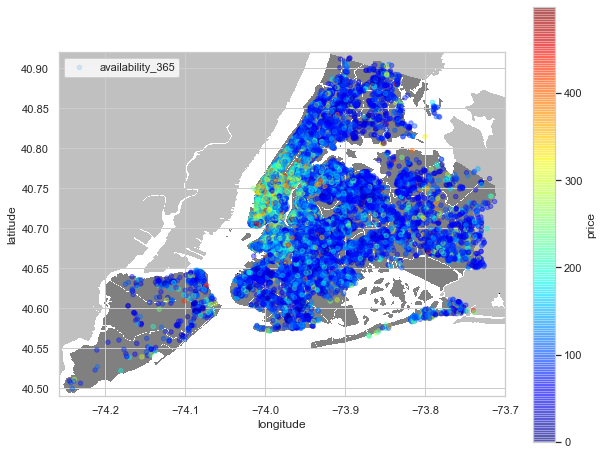

In [29]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
img=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(img)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub_df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

In [42]:
# Name column 
#empty list for string names
names_list = []

for name in df1.name:
    names_list.append(name)

    #split name strings into seperate words with function

def split_name(name):
    spl=str(name).split()
    return spl 

names_count = []

for x in names_list:
    for word in split_name(x):
        word = word.lower()
        names_count.append(word)

In [43]:
#we are going to use counter
from collections import Counter
#let's see top 25 used words by host to name their listing
_top_25_w=Counter(names_count).most_common()
_top_25_w=_top_25_w[0:25]
_top_25_w

[('in', 16733),
 ('room', 9389),
 ('bedroom', 7231),
 ('private', 6985),
 ('apartment', 6113),
 ('cozy', 4634),
 ('the', 3869),
 ('to', 3827),
 ('studio', 3772),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3387),
 ('1', 3357),
 ('with', 3092),
 ('2', 3079),
 ('of', 2993),
 ('east', 2967),
 ('and', 2869),
 ('manhattan', 2855),
 ('&', 2820),
 ('park', 2632),
 ('sunny', 2536),
 ('beautiful', 2320),
 ('near', 2295),
 ('williamsburg', 2293)]

In [44]:
# #now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'in'),
 Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'the'),
 Text(0, 0, 'to'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'with'),
 Text(0, 0, '2'),
 Text(0, 0, 'of'),
 Text(0, 0, 'east'),
 Text(0, 0, 'and'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '&'),
 Text(0, 0, 'park'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'williamsburg')]

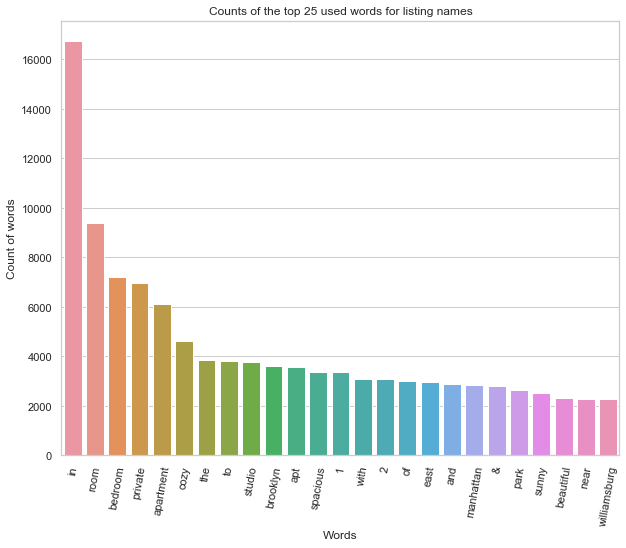

In [46]:
v5=sns.barplot(x='Words', y='Count', data=sub_w)
v5.set_title('Counts of the top 25 used words for listing names')
v5.set_ylabel('Count of words')
v5.set_xlabel('Words')
v5.set_xticklabels(v5.get_xticklabels(), rotation=80)


#This shows that there are no catchphrases or 'popular/trending' terms that are used for names; hosts use very simple terms describing the space and the area where the listing is. 

In [51]:
# number of reviews
#value counts wont work for int 

top_reviewed_listings = df1.nlargest(10,'number_of_reviews')
top_reviewed_listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0


In [63]:
price_avg = top_reviewed_listings['price']
price_avg = price_avg.mean()
price_median = top_reviewed_listings['price']
price_median = price_median.median()
print('Average price per night in USD: {}'.format(price_avg))
print('Median price per night in USD : {}'.format(price_median))

Average price per night in USD: 65.4
Median price per night in USD : 49.0
